In [2]:
import numpy as np
import pandas as pd
import datetime
import random
random.seed(10)

# Preparing the grid

In [ ]:
#find the lat-lonf range
# lat_range = {'min': 28.486, 'max': 28.72}
# long_range = {'min': 77.1, 'max': 77.32}
# # area = 21*26 sq km

In [5]:
lat_min = 29
lat_max = 27
long_min = 78
long_max = 76
for i in range(1, 31):
    if i<10:
        datafile = '../PM Datasets/2020-11-' + str(0) + str(i) + '_all.csv'
    else:
        datafile = '../PM Datasets/2020-11-' + str(i) + '_all.csv'
    
    df = pd.read_csv(datafile)
    df = df[['lat', 'long']]
    df.lat = round(round(5*df.lat.astype(float),2)/5.0,3)
    df.long= round(round(5*df.long.astype(float),2)/5.0,3)
    df = df[(df.lat.astype(int) == 28) &(df.long.astype(int) == 77)]
    lat_min = min(lat_min, df.lat.min())
    lat_max = max(lat_max, df.lat.max())
    long_min = min(long_min, df.long.min())
    long_max = max(long_max, df.long.max())
for i in range(1, 32):
    if i<10:
        datafile = '../PM Datasets/2020-12-' + str(0) + str(i) + '_all.csv'
    else:
        datafile = '../PM Datasets/2020-12-' + str(i) + '_all.csv'
    
    df = pd.read_csv(datafile)
    df = df[['lat', 'long']]
    df.lat = round(round(5*df.lat.astype(float),2)/5.0,3)
    df.long= round(round(5*df.long.astype(float),2)/5.0,3)
    df = df[(df.lat.astype(int) == 28) &(df.long.astype(int) == 77)]
    lat_min = min(lat_min, df.lat.min())
    lat_max = max(lat_max, df.lat.max())
    long_min = min(long_min, df.long.min())
    long_max = max(long_max, df.long.max())
for i in range(1, 31):
    if i<10:
        datafile = '../PM Datasets/2021-01-' + str(0) + str(i) + '_all.csv'
    else:
        datafile = '../PM Datasets/2021-01-' + str(i) + '_all.csv'
    
    df = pd.read_csv(datafile)
    df = df[['lat', 'long']]
    df.lat = round(round(5*df.lat.astype(float),2)/5.0,3)
    df.long= round(round(5*df.long.astype(float),2)/5.0,3)
    df = df[(df.lat.astype(int) == 28) &(df.long.astype(int) == 77)]
    lat_min = min(lat_min, df.lat.min())
    lat_max = max(lat_max, df.lat.max())
    long_min = min(long_min, df.long.min())
    long_max = max(long_max, df.long.max())

In [6]:
# TODO: Add buffer and consider train-data for range
lat_range = {'min': lat_min, 'max': lat_max}
long_range = {'min': long_min, 'max': long_max}
n_lat_grid = 25
n_long_grid = 25

In [ ]:
##Prepare the grid (25*25)

In [7]:
df1 = pd.DataFrame()
day = []
grid_size = []
for i in range(1, 31):
    if i<10:
        datafile = '../PM Datasets/2020-11-' + str(0) + str(i) + '_all.csv'
    else:
        datafile = '../PM Datasets/2020-11-' + str(i) + '_all.csv'
    
    df2 = pd.read_csv(datafile)
    df2 = df2[['lat', 'long']]
    df2.lat = round(round(5*df2.lat.astype(float),2)/5.0,3)
    df2.long= round(round(5*df2.long.astype(float),2)/5.0,3)
    # Ensuring Delhi region and removing outliers from data
    df2 = df2[(df2.lat.astype(int) == 28) &(df2.long.astype(int) == 77)]
    df2['lat_grid'] = df2.apply(lambda row: int((n_lat_grid-1)*(row.lat-lat_range['min'])/(lat_range['max']-lat_range['min'])), axis=1 )
    df2['long_grid'] = df2.apply(lambda row: int((n_long_grid-1)*(row.long-long_range['min'])/(long_range['max']-long_range['min'])), axis=1 )
    df2['lat_grid'] = df2['lat_grid'].astype(float).astype(int)
    df2['long_grid'] = df2['long_grid'].astype(float).astype(int)
    df2 = df2.groupby(['lat_grid', 'long_grid']).size().reset_index()
    day.append(datafile)
    grid_size.append(df2.shape[0])
    df1 = pd.concat([df1, df2])
    df1 = df1.groupby(['lat_grid', 'long_grid']).size().reset_index()
    
for i in range(1, 32):
    if i<10:
        datafile = '../PM Datasets/2020-12-' + str(0) + str(i) + '_all.csv'
    else:
        datafile = '../PM Datasets/2020-12-' + str(i) + '_all.csv'
    
    df2 = pd.read_csv(datafile)
    df2 = df2[['lat', 'long']]
    df2.lat = round(round(5*df2.lat.astype(float),2)/5.0,3)
    df2.long= round(round(5*df2.long.astype(float),2)/5.0,3)
    # Ensuring Delhi region and removing outliers from data
    df2 = df2[(df2.lat.astype(int) == 28) &(df2.long.astype(int) == 77)]
    df2['lat_grid'] = df2.apply(lambda row: int((n_lat_grid-1)*(row.lat-lat_range['min'])/(lat_range['max']-lat_range['min'])), axis=1 )
    df2['long_grid'] = df2.apply(lambda row: int((n_long_grid-1)*(row.long-long_range['min'])/(long_range['max']-long_range['min'])), axis=1 )
    df2['lat_grid'] = df2['lat_grid'].astype(float).astype(int)
    df2['long_grid'] = df2['long_grid'].astype(float).astype(int)
    df2 = df2.groupby(['lat_grid', 'long_grid']).size().reset_index()
    day.append(datafile)
    grid_size.append(df2.shape[0])
    df1 = pd.concat([df1, df2])
    df1 = df1.groupby(['lat_grid', 'long_grid']).size().reset_index() 
    
for i in range(1, 31):
    if i<10:
        datafile = '../PM Datasets/2021-01-' + str(0) + str(i) + '_all.csv'
    else:
        datafile = '../PM Datasets/2021-01-' + str(i) + '_all.csv'
    
    df2 = pd.read_csv(datafile)
    df2 = df2[['lat', 'long']]
    df2.lat = round(round(5*df2.lat.astype(float),2)/5.0,3)
    df2.long= round(round(5*df2.long.astype(float),2)/5.0,3)
    # Ensuring Delhi region and removing outliers from data
    df2 = df2[(df2.lat.astype(int) == 28) &(df2.long.astype(int) == 77)]
    df2['lat_grid'] = df2.apply(lambda row: int((n_lat_grid-1)*(row.lat-lat_range['min'])/(lat_range['max']-lat_range['min'])), axis=1 )
    df2['long_grid'] = df2.apply(lambda row: int((n_long_grid-1)*(row.long-long_range['min'])/(long_range['max']-long_range['min'])), axis=1 )
    df2['lat_grid'] = df2['lat_grid'].astype(float).astype(int)
    df2['long_grid'] = df2['long_grid'].astype(float).astype(int)
    df2 = df2.groupby(['lat_grid', 'long_grid']).size().reset_index()
    day.append(datafile)
    grid_size.append(df2.shape[0])
    df1 = pd.concat([df1, df2])
    df1 = df1.groupby(['lat_grid', 'long_grid']).size().reset_index()

In [8]:
#populated grid indices
del df1[0]
df1 = df1[["lat_grid", "long_grid"]]
df1.to_csv('grid_points_25.csv')

In [9]:
#number of populates grid points on each day
data = pd.DataFrame()
data['day'] = day
data['grid_size'] = grid_size
data

,day,grid_size
0,../PM Datasets/2020-11-01_all.csv,73
1,../PM Datasets/2020-11-02_all.csv,96
2,../PM Datasets/2020-11-03_all.csv,111
3,../PM Datasets/2020-11-04_all.csv,117
4,../PM Datasets/2020-11-05_all.csv,80
...,...,...
86,../PM Datasets/2021-01-26_all.csv,107
87,../PM Datasets/2021-01-27_all.csv,148
88,../PM Datasets/2021-01-28_all.csv,132
89,../PM Datasets/2021-01-29_all.csv,148


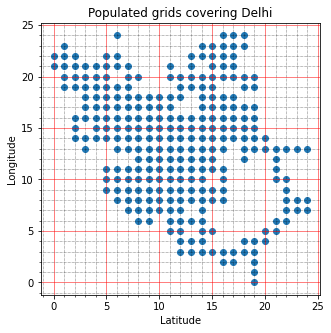

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
df1 = pd.read_csv('grid_points_25.csv')
x = np.array(df1['lat_grid'])
y = np.array(df1['long_grid'])
plt.figure(figsize=(5, 5))
plt.scatter(x, y)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
#ax1.set_ylim(bottom=-1.5,top=1.5)
plt.title('Populated grids covering Delhi')
# Turn on the minor TICKS, which are required for the minor GRID
plt.minorticks_on()

# Customize the major grid
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('grid.png')
plt.show()

# Adjacency matrix

In [7]:
from scipy.spatial.distance import pdist, euclidean, squareform 
lat_range = {'min': 28.486, 'max': 28.72}
long_range = {'min': 77.1, 'max': 77.32}
n_lat_grid = 25
n_long_grid = 25

#adjacency matrix
grid_points = pd.read_csv('Data/grid_points_25.csv')
n_grid_points = grid_points.shape[0] 
X = grid_points[["lat_grid", "long_grid"]].to_numpy()
grid_points = grid_points.pivot_table(index=['lat_grid', 'long_grid'])
grid_points_indices = grid_points.index

# adjacency matrix will be 1 for the nerighbouring 8 grids and the self grid, 0 otherwise
f = lambda u, v: max(abs(u-v))<=1
adj = squareform(pdist(X, f))
eye = np.identity(n_grid_points)
adj = adj+eye
print(adj.shape) 
np.savetxt('adj_near8.txt', adj, fmt='%d')
adj = np.loadtxt('adj_near8.txt', dtype=int)

# adjacency matrix will be 1 for the first(acc to eucledian distance) nerighbouring 8 grids that have pollution values and the self grid, 0 otherwise
adj = []
for u in X:
    distance_u = [euclidean(u, vertex) for vertex in X]
    first_9_neighbours_idx = np.argsort(distance_u)[:9]
    adj_u = [1 if idx in first_9_neighbours_idx else 0 for idx in range(0, n_grid_points)]
    adj.append(adj_u)
adj = np.array(adj)
print(adj.shape)
np.savetxt('adj_first8.txt', adj, fmt='%d')
adj = np.loadtxt('adj_first8.txt', dtype=int)

(270, 270)
(270, 270)


# Data Modelling

In [9]:
def data_preparation(datafile):
    lat_range = {'min': 28.486, 'max': 28.72}
    long_range = {'min': 77.1, 'max': 77.32}
    n_lat_grid = 25
    n_long_grid = 25
    
    #Put the file location
    df = pd.read_csv(datafile)
    #type casting
    df.pm1_0 = df.pm1_0.astype(float)
    df.pm2_5 = df.pm2_5.astype(float)
    df.pm10 = df.pm10.astype(float)
    df.lat = round(round(5*df.lat.astype(float),2)/5.0,3)
    df.long= round(round(5*df.long.astype(float),2)/5.0,3)

    # Ensuring Delhi region and removing outliers from data
    df = df[(df.lat.astype(int) == 28) &(df.long.astype(int) == 77)]
    df = df[(df.pm1_0<=1500) & (df.pm2_5<=1500) & (df.pm10<=1500) & (df.pm1_0>=20) & (df.pm2_5>=30) & (df.pm10>=30)]
    #df = df[(df.humidity<=60)&(df.humidity>=7)]

    df['lat_grid'] = df.apply(lambda row: int((n_lat_grid-1)*(row.lat-lat_range['min'])/(lat_range['max']-lat_range['min'])), axis=1 )
    df['long_grid'] = df.apply(lambda row: int((n_long_grid-1)*(row.long-long_range['min'])/(long_range['max']-long_range['min'])), axis=1 )
    df['lat_grid'] = df['lat_grid'].astype(float).astype(int)
    df['long_grid'] = df['long_grid'].astype(float).astype(int)

    # rounding @180min
    df.dateTime = pd.to_datetime(df.dateTime)
    df.dateTime = df.dateTime.dt.round('180min')
    # use time as a feature as well
    df.dateTime = df.dateTime.dt.hour*60 + df.dateTime.dt.minute
    #taking only data from 6Am-12midnight
    df = df[(df.dateTime>=360)] 
    df = df.pivot_table(index=['lat_grid','long_grid'], columns='dateTime', aggfunc='mean')['pm2_5']
    df = df.fillna(0)
    return df

In [ ]:
# df = data_preparation('PM Datasets/2020-12-01_all.csv')
# for i in range(2, 8):
#     datafile = 'PM Datasets/2020-12-'
#     datafile +=  str(0) + str(i) if i<10 else str(i)
#     datafile +=  '_all.csv'
#     df1 = data_preparation(datafile)
#     df = pd.concat([df,df1], axis=1)
#     df = df.fillna(0)
# df.to_csv('Dummy_data_1week_7Dec.csv')

In [ ]:
# df = pd.read_csv('Dummy_data_1week_7Dec.csv')
# df = df.set_index(['lat_grid','long_grid'])

In [11]:
# !pip install missingno

In [ ]:
# import missingno as msno
# import matplotlib.pyplot as plt
# df = data_preparation('PM Datasets/2021-01-23_all.csv')
# msno.bar(df, figsize=(12, 6), fontsize=12, color='steelblue')

# Creating dummy data files for test evaluations
<!-- file name -> test date with previous 6 days as training data -->


In [9]:
df = data_preparation('../PM Datasets/2020-11-09_all.csv')
for i in range(10, 16):
    datafile = '../PM Datasets/2020-11-'
    datafile +=  str(0) + str(i) if i<10 else str(i)
    datafile +=  '_all.csv'
    df1 = data_preparation(datafile)
    df = pd.concat([df,df1], axis=1)
    df = df.fillna(0)
df.to_csv('Dummy_data_1week_15Nov.csv')

In [10]:
df = data_preparation('../PM Datasets/2020-11-14_all.csv')
for i in range(15, 21):
    datafile = '../PM Datasets/2020-11-'
    datafile +=  str(0) + str(i) if i<10 else str(i)
    datafile +=  '_all.csv'
    df1 = data_preparation(datafile)
    df = pd.concat([df,df1], axis=1)
    df = df.fillna(0)
df.to_csv('Dummy_data_1week_20Nov.csv')

In [11]:
df = data_preparation('../PM Datasets/2020-11-22_all.csv')
for i in range(23, 29):
    datafile = '../PM Datasets/2020-11-'
    datafile +=  str(0) + str(i) if i<10 else str(i)
    datafile +=  '_all.csv'
    df1 = data_preparation(datafile)
    df = pd.concat([df,df1], axis=1)
    df = df.fillna(0)
df.to_csv('Dummy_data_1week_28Nov.csv')

In [12]:
df = data_preparation('../PM Datasets/2020-12-01_all.csv')
for i in range(2, 8):
    datafile = '../PM Datasets/2020-12-'
    datafile +=  str(0) + str(i) if i<10 else str(i)
    datafile +=  '_all.csv'
    df1 = data_preparation(datafile)
    df = pd.concat([df,df1], axis=1)
    df = df.fillna(0)
df.to_csv('Dummy_data_1week_7Dec.csv')

In [13]:
df = data_preparation('../PM Datasets/2020-12-09_all.csv')
for i in range(10, 16):
    datafile = '../PM Datasets/2020-12-'
    datafile +=  str(0) + str(i) if i<10 else str(i)
    datafile +=  '_all.csv'
    df1 = data_preparation(datafile)
    df = pd.concat([df,df1], axis=1)
    df = df.fillna(0)
df.to_csv('Dummy_data_1week_15Dec.csv')

In [14]:
df = data_preparation('../PM Datasets/2021-01-01_all.csv')
for i in range(2, 8):
    datafile = '../PM Datasets/2021-01-'
    datafile +=  str(0) + str(i) if i<10 else str(i)
    datafile +=  '_all.csv'
    df1 = data_preparation(datafile)
    df = pd.concat([df,df1], axis=1)
    df = df.fillna(0)
df.to_csv('Dummy_data_1week_7Jan.csv') 

df = data_preparation('../PM Datasets/2021-01-04_all.csv')
for i in range(5, 11):
    datafile = '../PM Datasets/2021-01-'
    datafile +=  str(0) + str(i) if i<10 else str(i)
    datafile +=  '_all.csv'
    df1 = data_preparation(datafile)
    df = pd.concat([df,df1], axis=1)
    df = df.fillna(0)
df.to_csv('Dummy_data_1week_10Jan.csv')

In [16]:
df = data_preparation('../PM Datasets/2021-01-18_all.csv')
for i in range(19, 25):
    datafile = '../PM Datasets/2021-01-'
    datafile +=  str(0) + str(i) if i<10 else str(i)
    datafile +=  '_all.csv'
    df1 = data_preparation(datafile)
    df = pd.concat([df,df1], axis=1)
    df = df.fillna(0)
df.to_csv('Dummy_data_1week_24Jan.csv')